## 0. Goal
Run UMAP directly on spectrograms from different preprocessing choices. <br>
Then use Hopkins metrics and Silloutte score to quantify clusterability. 

In [1]:
import os, sys, importlib, librosa, glob, h5py, tqdm
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed
import random
import umap, hdbscan
from collections import Counter
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score

plt.rcParams['pdf.fonttype'] = 42 

In [2]:
# import my utility script
cluster_script_path = '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/'
sys.path.insert(1, cluster_script_path)
import vae_goffinet, hopkins
importlib.reload(vae_goffinet)

<module 'vae_goffinet' from '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/vae_goffinet.py'>

In [3]:
# create a custom colormap for spectrogram
jet = plt.get_cmap('jet', 255)
# Extract jet colors and prepend black at the beginning
jet_colors = jet(np.linspace(0, 1, 255))
custom_colors = np.vstack([[0, 0, 0, 1], jet_colors])  # Black for 0, then jet
custom_cmap = ListedColormap(custom_colors)

## 1. Inputs

In [4]:
fd_z4 = '/mnt/z4'
fd_data = os.path.join(fd_z4, 'zz367', 'EphysMONAO', 'Analyzed', 'vaeWav')
birdIDs = ['pair5RigCCU29', 'pair4RigACU68', 'pair4RigBCU53', 'pair2RigBCU25']
# color limits when calculating spectrograms, depending on the audio amplitude, may differ between birds
clims = [[1.5,7], [1.5,7], [1.5,8.5], [1.5,8]]
# what syllable to analyze
syl = ['v']
sylStr = ''.join(syl)
# the default color list
col_list = ['#e41a1c','#a65628','#4daf4a','#984ea3','#ff7f00','#f781bf','#377eb8','#737373']

In [5]:
# what preprocessed spectrogram datasets?
run_names = []
for s in ['goffinet', 'sainburg']:
    for m in ['False', 'True']:
        for t in ['False', 'True']:
            run_names.append(f'spec_{s}_mel{m}_tstretch{t}')
print(run_names)

['spec_goffinet_melFalse_tstretchFalse', 'spec_goffinet_melFalse_tstretchTrue', 'spec_goffinet_melTrue_tstretchFalse', 'spec_goffinet_melTrue_tstretchTrue', 'spec_sainburg_melFalse_tstretchFalse', 'spec_sainburg_melFalse_tstretchTrue', 'spec_sainburg_melTrue_tstretchFalse', 'spec_sainburg_melTrue_tstretchTrue']


In [6]:
# paramteres for UMAP and HDBSCAN
param_umap = {'n_components':2, 'n_neighbors':25, 'min_dist':0, 'metric':'euclidean'}
param_hdbscan = {'min_cluster_size_frac':0.05, 'min_samples': 20}

## 2. UMAP, then HDBSCAN on each dataset

In [9]:
# save metrics in a master dataframe
metrics = pd.DataFrame()

Processing for pair5RigCCU29 spec_goffinet_melFalse_tstretchFalse...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 10:54:41 2025 Construct fuzzy simplicial set
Sat Jun  7 10:54:42 2025 Finding Nearest Neighbors
Sat Jun  7 10:54:42 2025 Building RP forest with 13 trees
Sat Jun  7 10:54:54 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 10:55:49 2025 Finished Nearest Neighbor Search
Sat Jun  7 10:55:49 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 10:56:02 2025 Finished embedding
The fraction that are not clustered: 0.1061
Total number of clusters: 6
Hopkins metric on UMAP: 0.9788
Silhouette score on HDBSCAN: 0.4011
Processing for pair5RigCCU29 spec_goffinet_melFalse_tstretchTrue...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 10:56:53 2025 Construct fuzzy simplicial set
Sat Jun  7 10:56:53 2025 Finding Nearest Neighbors
Sat Jun  7 10:56:53 2025 Building RP forest with 13 trees
Sat Jun  7 10:57:06 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 10:58:00 2025 Finished Nearest Neighbor Search
Sat Jun  7 10:58:00 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 10:58:13 2025 Finished embedding
The fraction that are not clustered: 0.0745
Total number of clusters: 6
Hopkins metric on UMAP: 0.9771
Silhouette score on HDBSCAN: 0.3491
Processing for pair5RigCCU29 spec_goffinet_melTrue_tstretchFalse...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 10:59:00 2025 Construct fuzzy simplicial set
Sat Jun  7 10:59:01 2025 Finding Nearest Neighbors
Sat Jun  7 10:59:01 2025 Building RP forest with 13 trees
Sat Jun  7 10:59:14 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:00:06 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:00:06 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:00:21 2025 Finished embedding
The fraction that are not clustered: 0.0482
Total number of clusters: 6
Hopkins metric on UMAP: 0.9816
Silhouette score on HDBSCAN: 0.3907
Processing for pair5RigCCU29 spec_goffinet_melTrue_tstretchTrue...
(23240, 128, 128) (23240, 7) (23240, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:01:04 2025 Construct fuzzy simplicial set
Sat Jun  7 11:01:04 2025 Finding Nearest Neighbors
Sat Jun  7 11:01:04 2025 Building RP forest with 13 trees
Sat Jun  7 11:01:19 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:02:09 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:02:10 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:02:24 2025 Finished embedding
The fraction that are not clustered: 0.1134
Total number of clusters: 6
Hopkins metric on UMAP: 0.9786
Silhouette score on HDBSCAN: 0.3753
Processing for pair5RigCCU29 spec_sainburg_melFalse_tstretchFalse...
(23240, 129, 141) (23240, 5) (23240, 18189)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:03:09 2025 Construct fuzzy simplicial set
Sat Jun  7 11:03:10 2025 Finding Nearest Neighbors
Sat Jun  7 11:03:10 2025 Building RP forest with 13 trees
Sat Jun  7 11:03:28 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:04:33 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:04:36 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:04:47 2025 Finished embedding
The fraction that are not clustered: 0.1968
Total number of clusters: 8
Hopkins metric on UMAP: 0.9784
Silhouette score on HDBSCAN: 0.2733
Processing for pair5RigCCU29 spec_sainburg_melFalse_tstretchTrue...
(23240, 129, 49) (23240, 5) (23240, 6321)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:05:05 2025 Construct fuzzy simplicial set


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:05:05 2025 Finding Nearest Neighbors
Sat Jun  7 11:05:05 2025 Building RP forest with 13 trees
Sat Jun  7 11:05:10 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:05:33 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:05:34 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:05:44 2025 Finished embedding
The fraction that are not clustered: 0.2266
Total number of clusters: 6
Hopkins metric on UMAP: 0.9725
Silhouette score on HDBSCAN: 0.2059
Processing for pair5RigCCU29 spec_sainburg_melTrue_tstretchFalse...
(23240, 32, 141) (23240, 5) (23240, 4512)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:06:02 2025 Construct fuzzy simplicial set


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:06:02 2025 Finding Nearest Neighbors
Sat Jun  7 11:06:02 2025 Building RP forest with 13 trees
Sat Jun  7 11:06:05 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:06:20 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:06:21 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:06:33 2025 Finished embedding
The fraction that are not clustered: 0.0361
Total number of clusters: 5
Hopkins metric on UMAP: 0.9748
Silhouette score on HDBSCAN: 0.4571
Processing for pair5RigCCU29 spec_sainburg_melTrue_tstretchTrue...
(23240, 32, 49) (23240, 5) (23240, 1568)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:06:47 2025 Construct fuzzy simplicial set
Sat Jun  7 11:06:47 2025 Finding Nearest Neighbors
Sat Jun  7 11:06:47 2025 Building RP forest with 13 trees


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:06:48 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:06:53 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:06:53 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:07:04 2025 Finished embedding
The fraction that are not clustered: 0.0798
Total number of clusters: 5
Hopkins metric on UMAP: 0.9715
Silhouette score on HDBSCAN: 0.2457
Processing for pair4RigACU68 spec_goffinet_melFalse_tstretchFalse...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:08:11 2025 Construct fuzzy simplicial set
Sat Jun  7 11:08:11 2025 Finding Nearest Neighbors
Sat Jun  7 11:08:12 2025 Building RP forest with 15 trees
Sat Jun  7 11:08:37 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:09:54 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:09:54 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:10:11 2025 Finished embedding
The fraction that are not clustered: 0.1412
Total number of clusters: 6
Hopkins metric on UMAP: 0.9815
Silhouette score on HDBSCAN: 0.3565
Processing for pair4RigACU68 spec_goffinet_melFalse_tstretchTrue...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:11:27 2025 Construct fuzzy simplicial set
Sat Jun  7 11:11:28 2025 Finding Nearest Neighbors
Sat Jun  7 11:11:28 2025 Building RP forest with 15 trees
Sat Jun  7 11:11:54 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:13:08 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:13:08 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:13:24 2025 Finished embedding
The fraction that are not clustered: 0.1768
Total number of clusters: 6
Hopkins metric on UMAP: 0.9842
Silhouette score on HDBSCAN: 0.2946
Processing for pair4RigACU68 spec_goffinet_melTrue_tstretchFalse...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:14:32 2025 Construct fuzzy simplicial set
Sat Jun  7 11:14:32 2025 Finding Nearest Neighbors
Sat Jun  7 11:14:33 2025 Building RP forest with 15 trees
Sat Jun  7 11:14:54 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:16:06 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:16:06 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:16:23 2025 Finished embedding


/tmp/ipykernel_3323800/1903780407.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])


The fraction that are not clustered: 0.0970
Total number of clusters: 5
Hopkins metric on UMAP: 0.9834
Silhouette score on HDBSCAN: 0.3705
Processing for pair4RigACU68 spec_goffinet_melTrue_tstretchTrue...
(36359, 128, 128) (36359, 7) (36359, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:17:30 2025 Construct fuzzy simplicial set
Sat Jun  7 11:17:30 2025 Finding Nearest Neighbors
Sat Jun  7 11:17:31 2025 Building RP forest with 15 trees
Sat Jun  7 11:17:53 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:19:04 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:19:04 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:19:21 2025 Finished embedding
The fraction that are not clustered: 0.1244
Total number of clusters: 5
Hopkins metric on UMAP: 0.9835
Silhouette score on HDBSCAN: 0.3859
Processing for pair4RigACU68 spec_sainburg_melFalse_tstretchFalse...
(36359, 129, 163) (36359, 5) (36359, 21027)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:20:38 2025 Construct fuzzy simplicial set
Sat Jun  7 11:20:39 2025 Finding Nearest Neighbors
Sat Jun  7 11:20:39 2025 Building RP forest with 15 trees
Sat Jun  7 11:21:10 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:22:50 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:22:58 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:23:16 2025 Finished embedding
The fraction that are not clustered: 0.0744
Total number of clusters: 2
Hopkins metric on UMAP: 0.9809
Silhouette score on HDBSCAN: 0.2737
Processing for pair4RigACU68 spec_sainburg_melFalse_tstretchTrue...
(36359, 129, 50) (36359, 5) (36359, 6450)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:23:45 2025 Construct fuzzy simplicial set


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:23:45 2025 Finding Nearest Neighbors
Sat Jun  7 11:23:45 2025 Building RP forest with 15 trees
Sat Jun  7 11:23:54 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:24:27 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:24:27 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:24:43 2025 Finished embedding
The fraction that are not clustered: 0.2822
Total number of clusters: 6
Hopkins metric on UMAP: 0.9736
Silhouette score on HDBSCAN: 0.1042
Processing for pair4RigACU68 spec_sainburg_melTrue_tstretchFalse...
(36359, 32, 163) (36359, 5) (36359, 5216)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:25:11 2025 Construct fuzzy simplicial set
Sat Jun  7 11:25:12 2025 Finding Nearest Neighbors
Sat Jun  7 11:25:12 2025 Building RP forest with 15 trees
Sat Jun  7 11:25:18 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:25:42 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:25:42 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:25:58 2025 Finished embedding
The fraction that are not clustered: 0.1784
Total number of clusters: 7
Hopkins metric on UMAP: 0.9733
Silhouette score on HDBSCAN: 0.3643
Processing for pair4RigACU68 spec_sainburg_melTrue_tstretchTrue...
(36359, 32, 50) (36359, 5) (36359, 1600)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:26:18 2025 Construct fuzzy simplicial set
Sat Jun  7 11:26:18 2025 Finding Nearest Neighbors
Sat Jun  7 11:26:18 2025 Building RP forest with 15 trees


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:26:20 2025 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:26:27 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:26:27 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:26:42 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 2
Hopkins metric on UMAP: 0.9717
Silhouette score on HDBSCAN: 0.2559
Processing for pair4RigBCU53 spec_goffinet_melFalse_tstretchFalse...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:27:19 2025 Construct fuzzy simplicial set
Sat Jun  7 11:27:19 2025 Finding Nearest Neighbors
Sat Jun  7 11:27:19 2025 Building RP forest with 11 trees
Sat Jun  7 11:27:26 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:27:58 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:27:59 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:28:06 2025 Finished embedding
The fraction that are not clustered: 0.2007
Total number of clusters: 6
Hopkins metric on UMAP: 0.9662
Silhouette score on HDBSCAN: 0.3620
Processing for pair4RigBCU53 spec_goffinet_melFalse_tstretchTrue...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:28:32 2025 Construct fuzzy simplicial set
Sat Jun  7 11:28:33 2025 Finding Nearest Neighbors
Sat Jun  7 11:28:33 2025 Building RP forest with 11 trees
Sat Jun  7 11:28:39 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:29:12 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:29:12 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:29:19 2025 Finished embedding
The fraction that are not clustered: 0.1768
Total number of clusters: 6
Hopkins metric on UMAP: 0.9731
Silhouette score on HDBSCAN: 0.3642
Processing for pair4RigBCU53 spec_goffinet_melTrue_tstretchFalse...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:29:46 2025 Construct fuzzy simplicial set
Sat Jun  7 11:29:46 2025 Finding Nearest Neighbors
Sat Jun  7 11:29:46 2025 Building RP forest with 11 trees
Sat Jun  7 11:29:52 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:30:24 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:30:24 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:30:32 2025 Finished embedding
The fraction that are not clustered: 0.1718
Total number of clusters: 6
Hopkins metric on UMAP: 0.9729
Silhouette score on HDBSCAN: 0.3069
Processing for pair4RigBCU53 spec_goffinet_melTrue_tstretchTrue...
(16194, 128, 128) (16194, 7) (16194, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:30:58 2025 Construct fuzzy simplicial set
Sat Jun  7 11:30:58 2025 Finding Nearest Neighbors
Sat Jun  7 11:30:58 2025 Building RP forest with 11 trees
Sat Jun  7 11:31:04 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:31:36 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:31:36 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:31:43 2025 Finished embedding
The fraction that are not clustered: 0.0456
Total number of clusters: 5
Hopkins metric on UMAP: 0.9726
Silhouette score on HDBSCAN: 0.3698
Processing for pair4RigBCU53 spec_sainburg_melFalse_tstretchFalse...
(10384, 129, 166) (10384, 5) (10384, 21414)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:32:06 2025 Construct fuzzy simplicial set
Sat Jun  7 11:32:06 2025 Finding Nearest Neighbors
Sat Jun  7 11:32:06 2025 Building RP forest with 10 trees
Sat Jun  7 11:32:12 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:32:45 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:32:45 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:32:50 2025 Finished embedding
The fraction that are not clustered: 0.1204
Total number of clusters: 6
Hopkins metric on UMAP: 0.9648
Silhouette score on HDBSCAN: 0.3119
Processing for pair4RigBCU53 spec_sainburg_melFalse_tstretchTrue...
(10384, 129, 51) (10384, 5) (10384, 6579)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:32:57 2025 Construct fuzzy simplicial set
Sat Jun  7 11:32:57 2025 Finding Nearest Neighbors
Sat Jun  7 11:32:57 2025 Building RP forest with 10 trees


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:32:58 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:33:09 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:33:09 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:33:14 2025 Finished embedding
The fraction that are not clustered: 0.1510
Total number of clusters: 5
Hopkins metric on UMAP: 0.9777
Silhouette score on HDBSCAN: 0.2997
Processing for pair4RigBCU53 spec_sainburg_melTrue_tstretchFalse...
(10384, 32, 166) (10384, 5) (10384, 5312)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:33:21 2025 Construct fuzzy simplicial set
Sat Jun  7 11:33:21 2025 Finding Nearest Neighbors
Sat Jun  7 11:33:21 2025 Building RP forest with 10 trees


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:33:22 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:33:30 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:33:30 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:33:35 2025 Finished embedding
The fraction that are not clustered: 0.0487
Total number of clusters: 4
Hopkins metric on UMAP: 0.9544
Silhouette score on HDBSCAN: 0.2997
Processing for pair4RigBCU53 spec_sainburg_melTrue_tstretchTrue...
(10384, 32, 51) (10384, 5) (10384, 1632)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:33:38 2025 Construct fuzzy simplicial set
Sat Jun  7 11:33:38 2025 Finding Nearest Neighbors
Sat Jun  7 11:33:38 2025 Building RP forest with 10 trees


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:33:39 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:33:41 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:33:41 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:33:46 2025 Finished embedding
The fraction that are not clustered: 0.0136
Total number of clusters: 2
Hopkins metric on UMAP: 0.9637
Silhouette score on HDBSCAN: 0.3882
Processing for pair2RigBCU25 spec_goffinet_melFalse_tstretchFalse...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:34:09 2025 Construct fuzzy simplicial set
Sat Jun  7 11:34:09 2025 Finding Nearest Neighbors
Sat Jun  7 11:34:09 2025 Building RP forest with 11 trees
Sat Jun  7 11:34:15 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:34:47 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:34:48 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:34:55 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 3
Hopkins metric on UMAP: 0.9788
Silhouette score on HDBSCAN: 0.6215
Processing for pair2RigBCU25 spec_goffinet_melFalse_tstretchTrue...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:35:23 2025 Construct fuzzy simplicial set
Sat Jun  7 11:35:23 2025 Finding Nearest Neighbors
Sat Jun  7 11:35:23 2025 Building RP forest with 11 trees
Sat Jun  7 11:35:30 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:36:02 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:36:02 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:36:10 2025 Finished embedding
The fraction that are not clustered: 0.0096
Total number of clusters: 3
Hopkins metric on UMAP: 0.9779
Silhouette score on HDBSCAN: 0.4221
Processing for pair2RigBCU25 spec_goffinet_melTrue_tstretchFalse...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:36:37 2025 Construct fuzzy simplicial set
Sat Jun  7 11:36:37 2025 Finding Nearest Neighbors
Sat Jun  7 11:36:37 2025 Building RP forest with 11 trees
Sat Jun  7 11:36:43 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:37:15 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:37:15 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:37:22 2025 Finished embedding
The fraction that are not clustered: 0.0254
Total number of clusters: 3
Hopkins metric on UMAP: 0.9752
Silhouette score on HDBSCAN: 0.4620
Processing for pair2RigBCU25 spec_goffinet_melTrue_tstretchTrue...
(16452, 128, 128) (16452, 7) (16452, 16384)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:37:49 2025 Construct fuzzy simplicial set
Sat Jun  7 11:37:49 2025 Finding Nearest Neighbors
Sat Jun  7 11:37:49 2025 Building RP forest with 11 trees
Sat Jun  7 11:37:56 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Sat Jun  7 11:38:27 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:38:27 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Jun  7 11:38:35 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 3
Hopkins metric on UMAP: 0.9770
Silhouette score on HDBSCAN: 0.6189
Processing for pair2RigBCU25 spec_sainburg_melFalse_tstretchFalse...
(3096, 129, 164) (3096, 5) (3096, 21156)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:38:46 2025 Construct fuzzy simplicial set


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:39:12 2025 Finding Nearest Neighbors
Sat Jun  7 11:39:14 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:39:14 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Jun  7 11:39:17 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 2
Hopkins metric on UMAP: 0.9901
Silhouette score on HDBSCAN: 0.8526
Processing for pair2RigBCU25 spec_sainburg_melFalse_tstretchTrue...
(3096, 129, 50) (3096, 5) (3096, 6450)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:39:20 2025 Construct fuzzy simplicial set


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:39:31 2025 Finding Nearest Neighbors
Sat Jun  7 11:39:31 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:39:31 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Jun  7 11:39:35 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 2
Hopkins metric on UMAP: 0.9875
Silhouette score on HDBSCAN: 0.8496
Processing for pair2RigBCU25 spec_sainburg_melTrue_tstretchFalse...
(3096, 32, 164) (3096, 5) (3096, 5248)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:39:37 2025 Construct fuzzy simplicial set


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:39:47 2025 Finding Nearest Neighbors
Sat Jun  7 11:39:48 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:39:48 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Jun  7 11:39:51 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 2
Hopkins metric on UMAP: 0.9892
Silhouette score on HDBSCAN: 0.8198
Processing for pair2RigBCU25 spec_sainburg_melTrue_tstretchTrue...
(3096, 32, 50) (3096, 5) (3096, 1600)
{'n_components': 2, 'n_neighbors': 25, 'min_dist': 0, 'metric': 'euclidean'}
UMAP(min_dist=0, n_jobs=1, n_neighbors=25, random_state=1118, verbose=True)
Sat Jun  7 11:39:53 2025 Construct fuzzy simplicial set


/home/zz367/miniconda3/envs/wseg_VAE/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Jun  7 11:39:58 2025 Finding Nearest Neighbors
Sat Jun  7 11:39:58 2025 Finished Nearest Neighbor Search
Sat Jun  7 11:39:58 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Jun  7 11:40:02 2025 Finished embedding
The fraction that are not clustered: 0.0000
Total number of clusters: 2
Hopkins metric on UMAP: 0.9836
Silhouette score on HDBSCAN: 0.8296


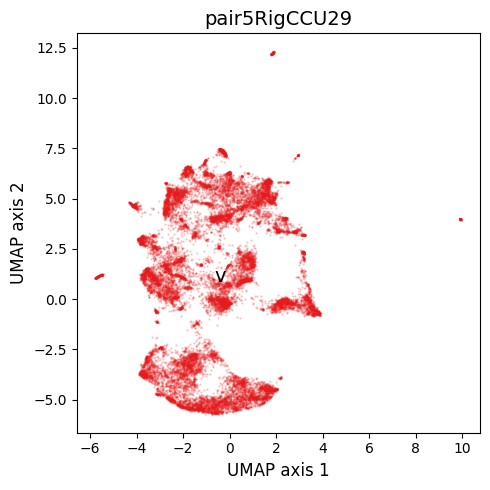

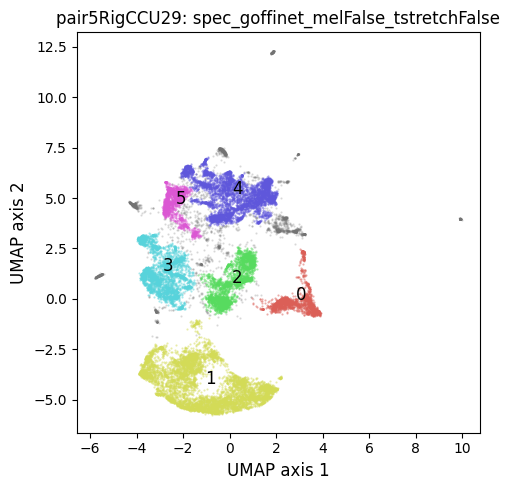

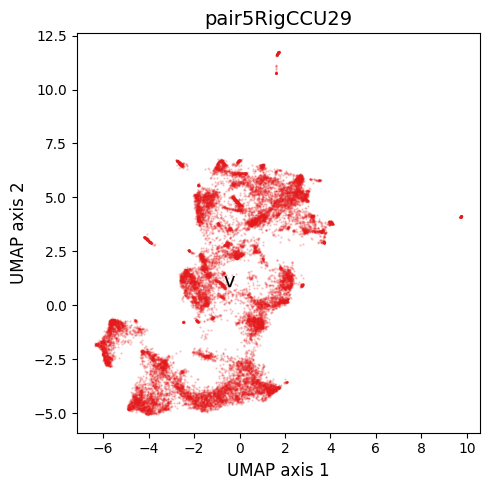

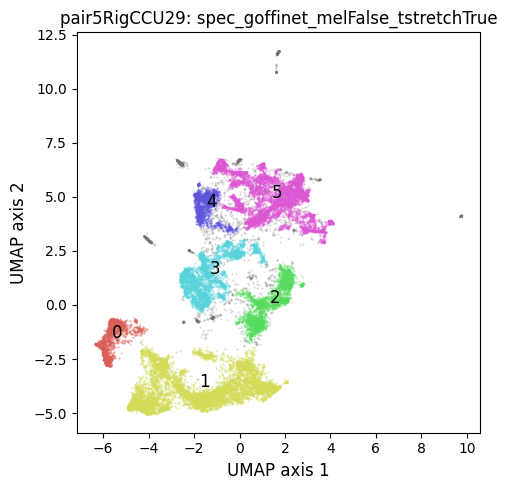

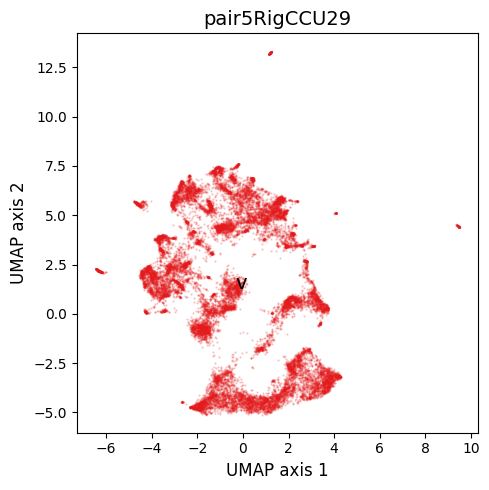

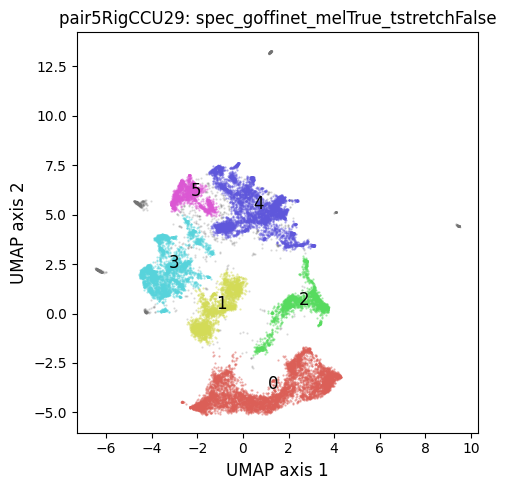

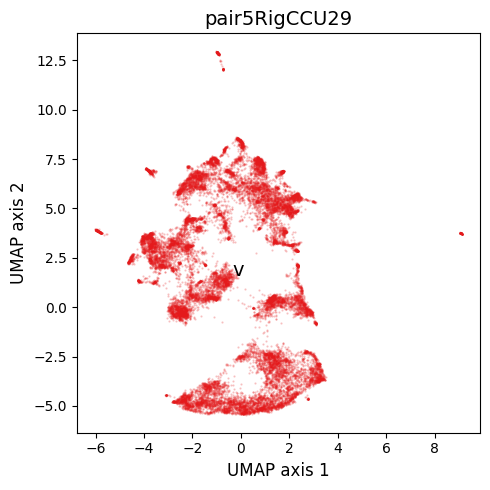

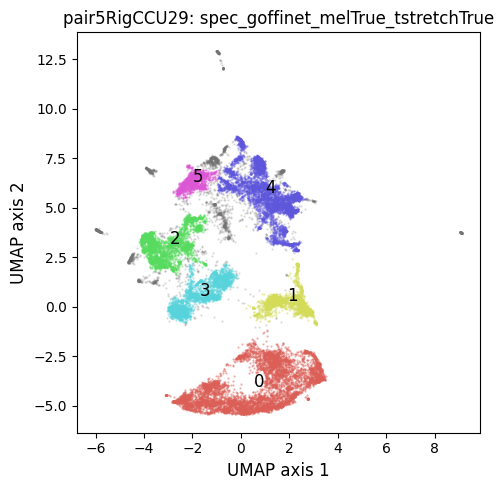

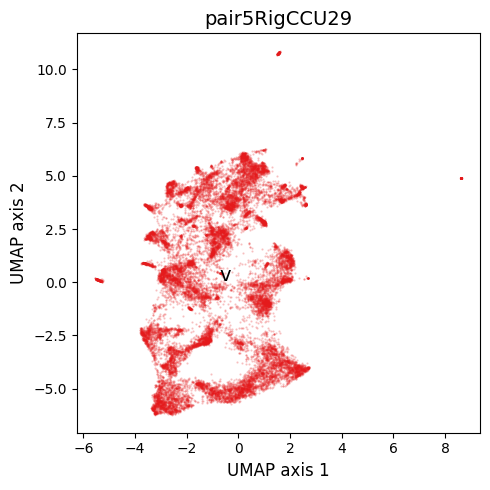

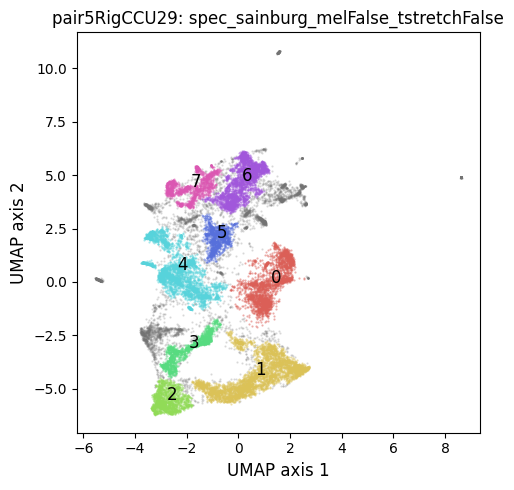

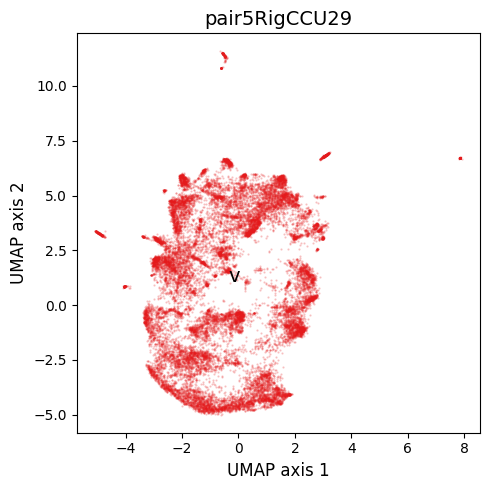

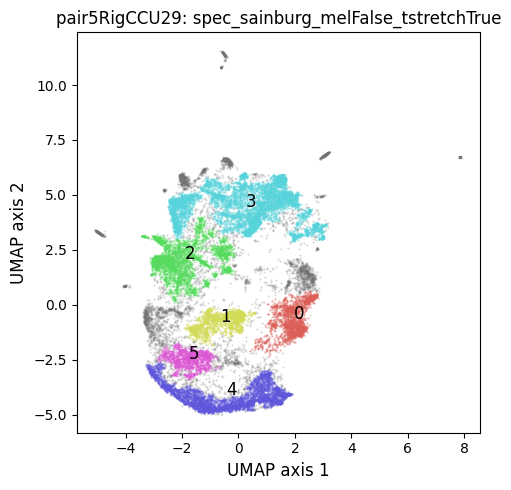

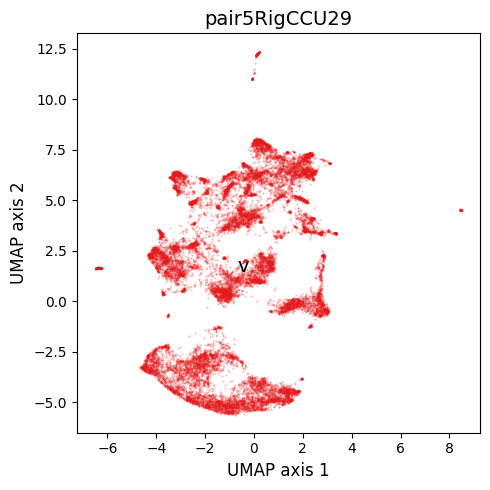

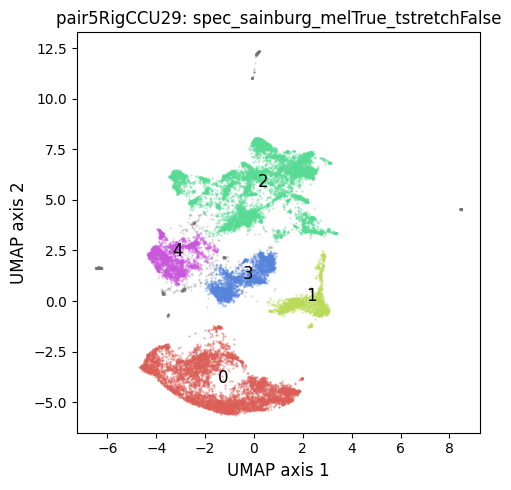

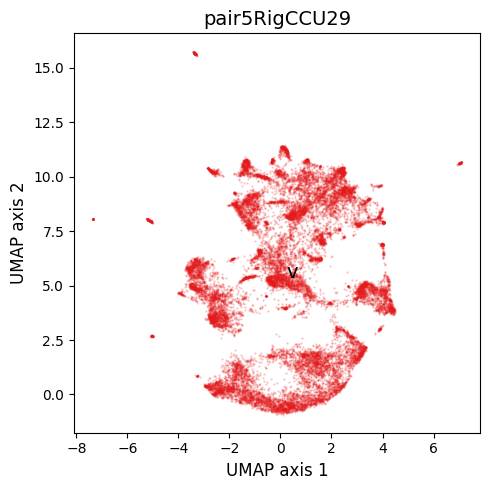

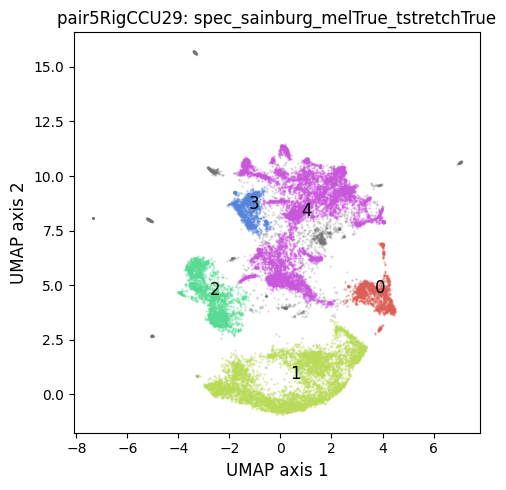

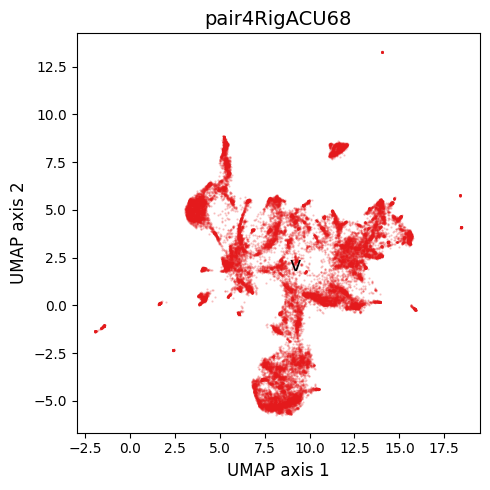

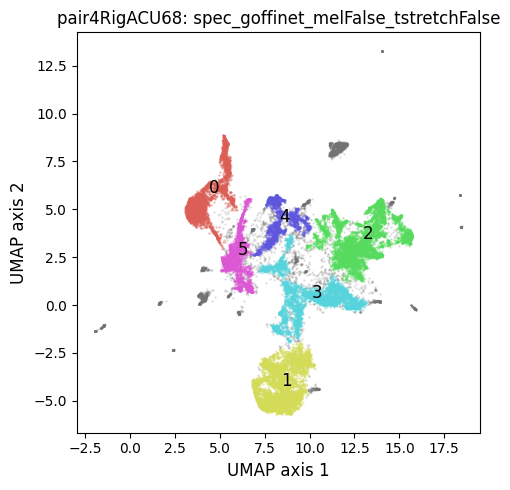

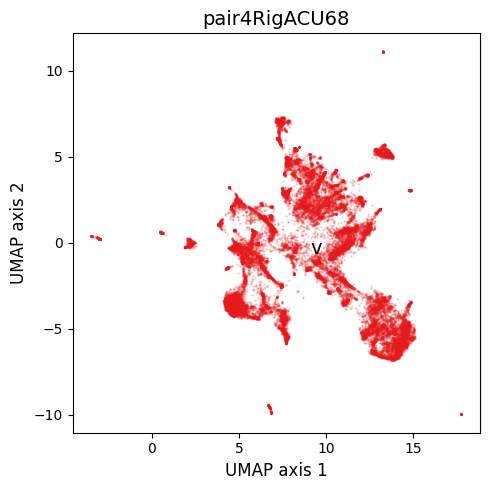

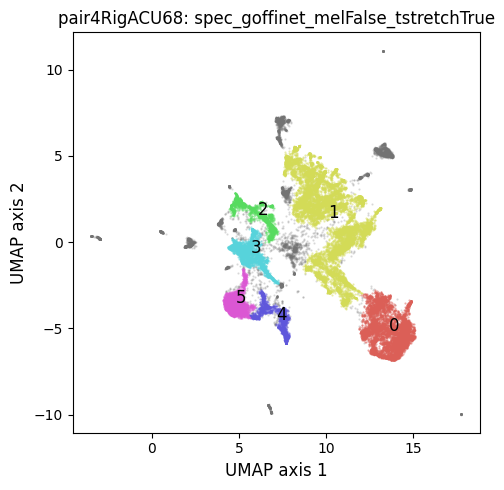

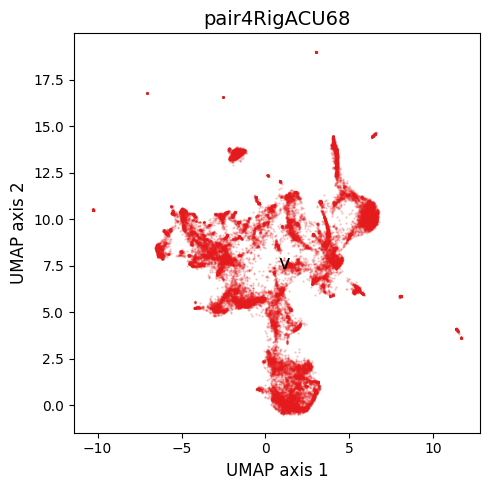

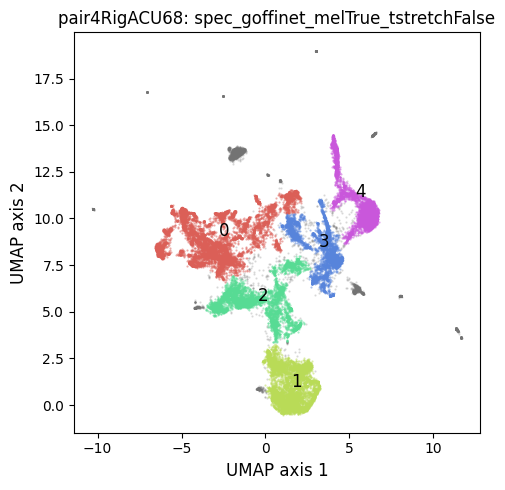

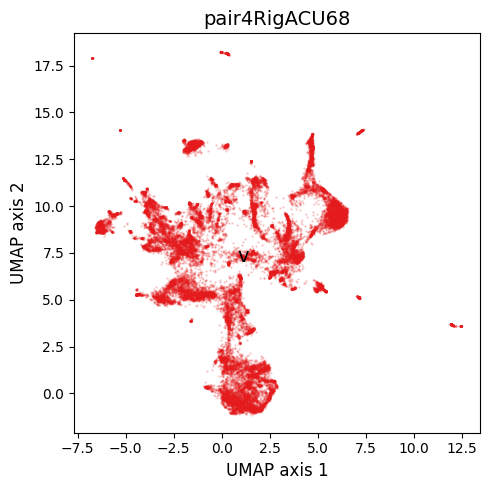

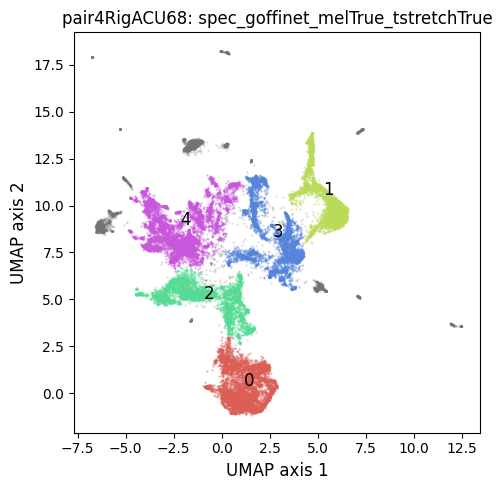

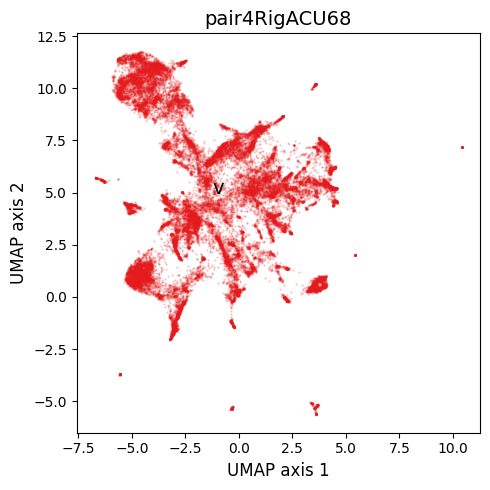

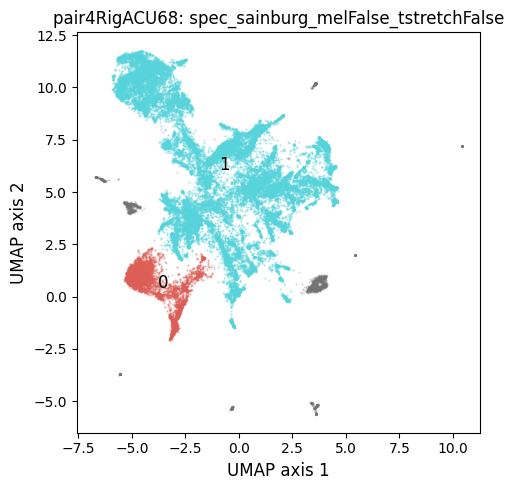

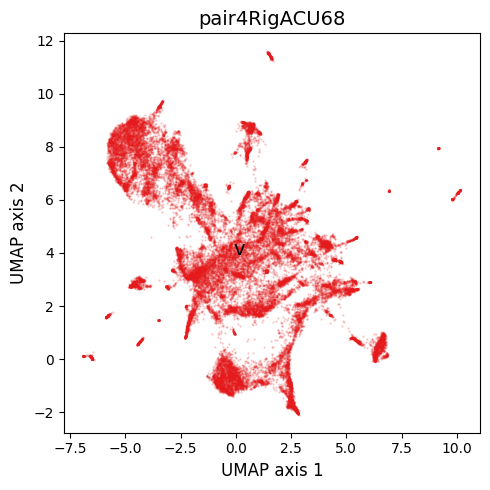

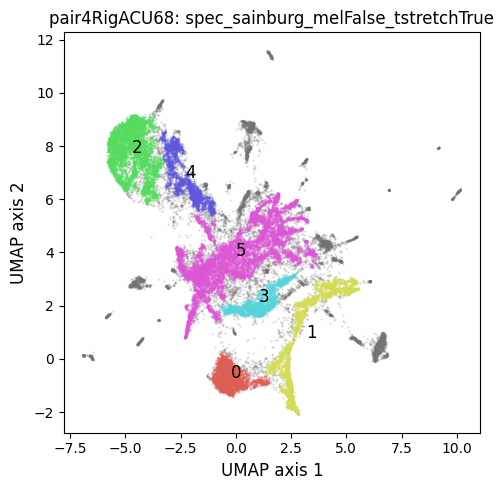

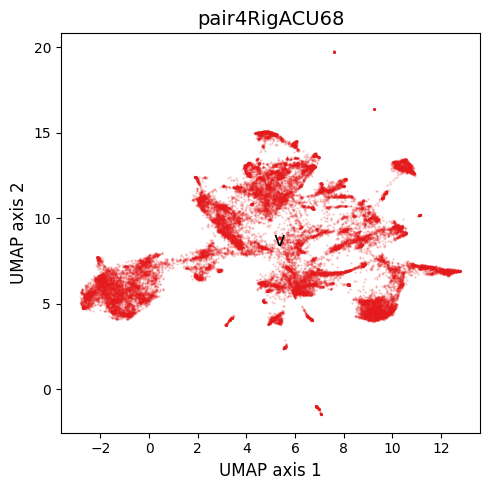

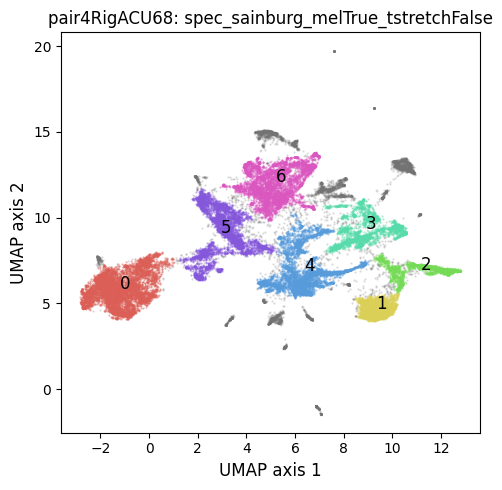

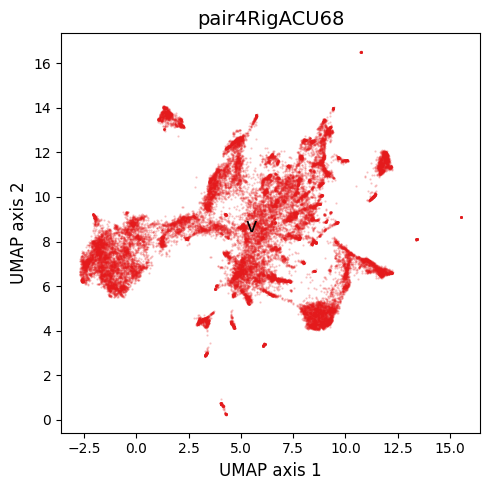

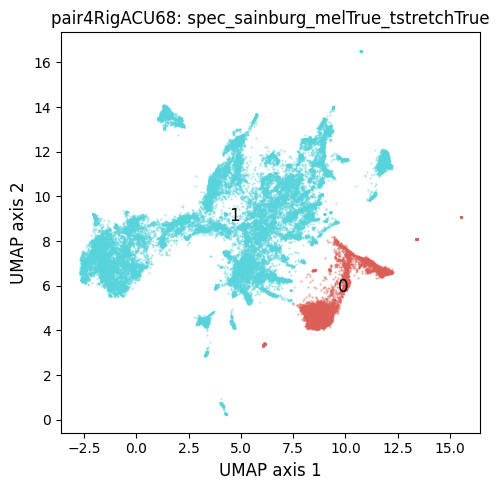

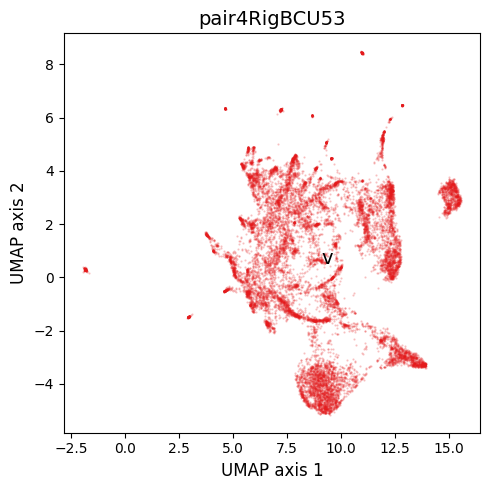

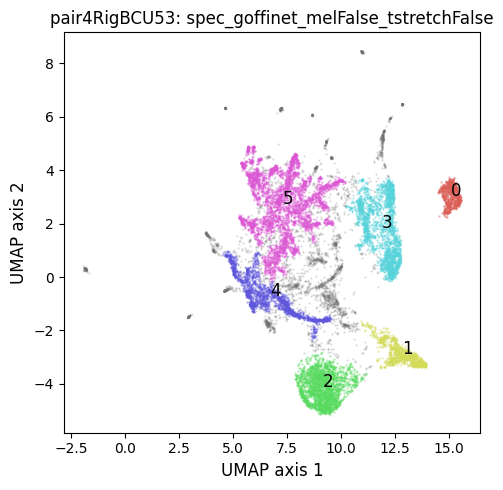

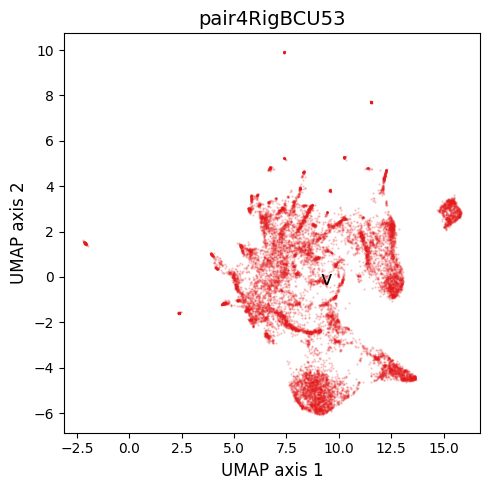

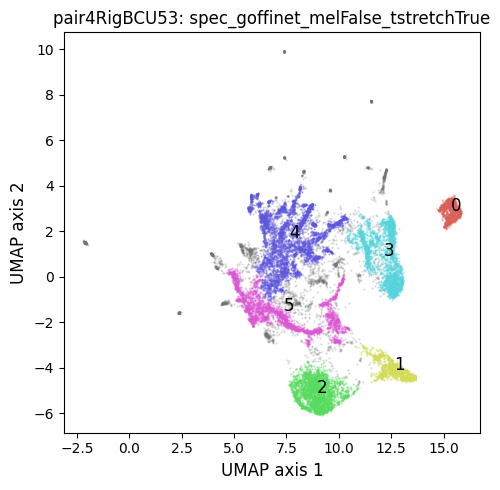

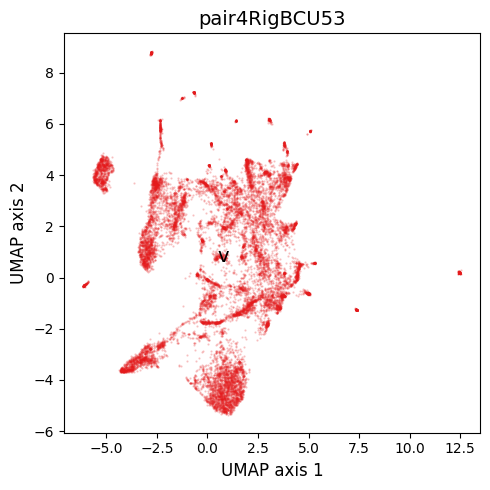

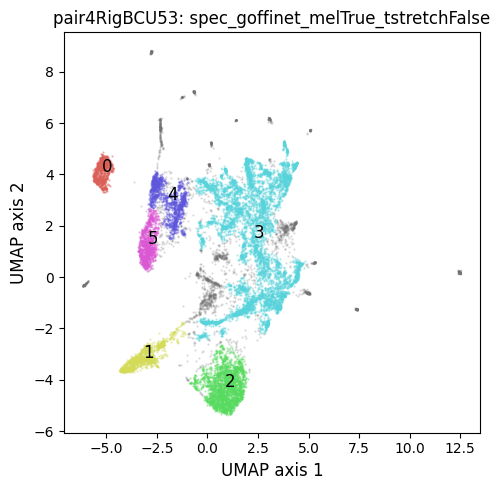

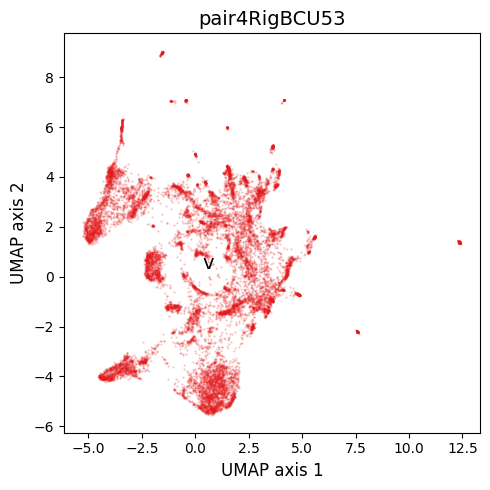

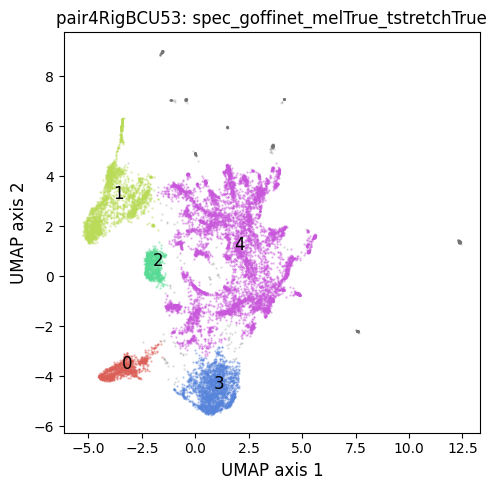

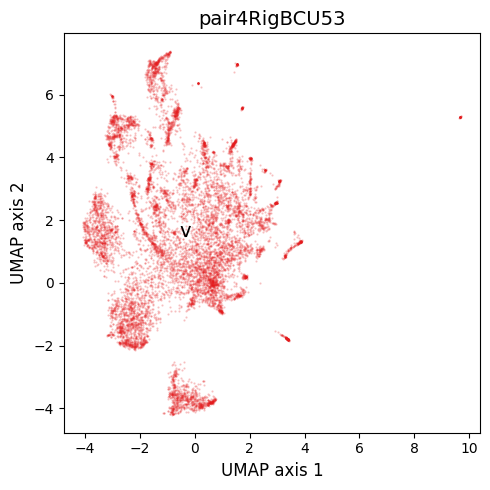

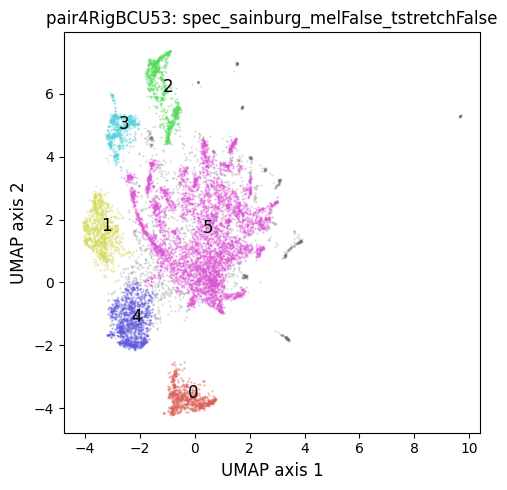

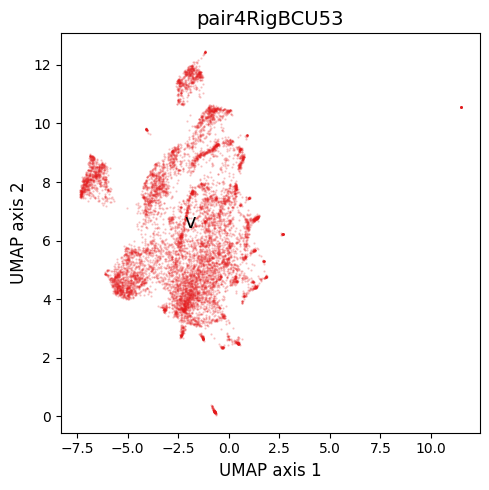

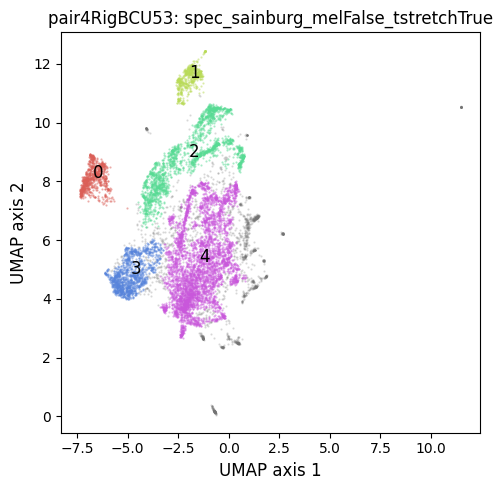

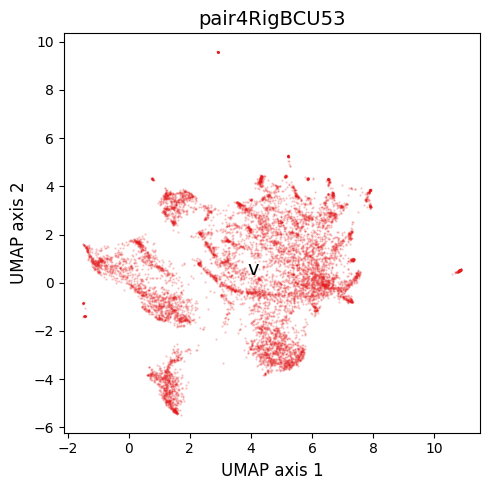

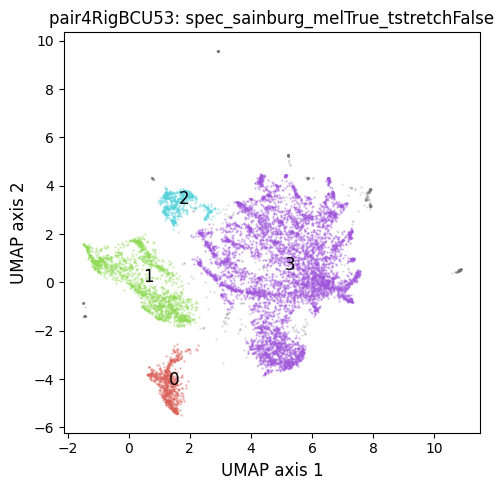

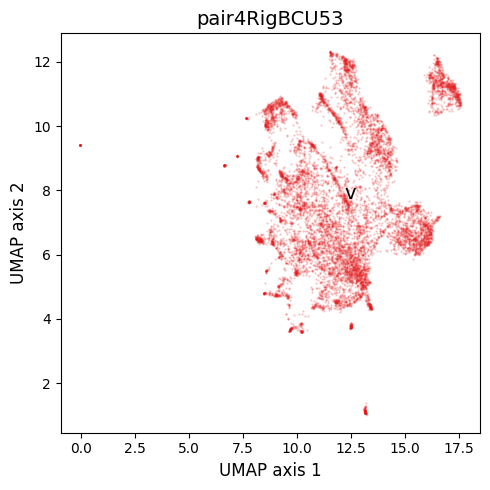

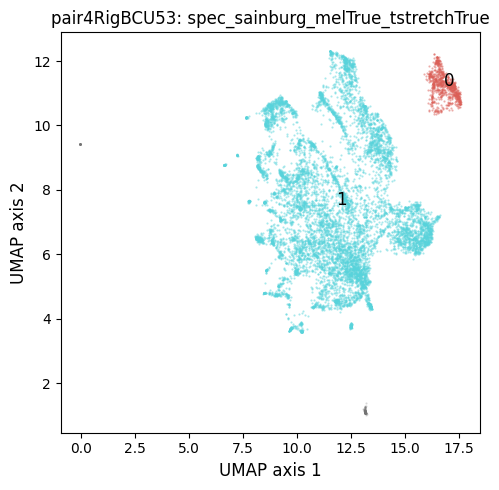

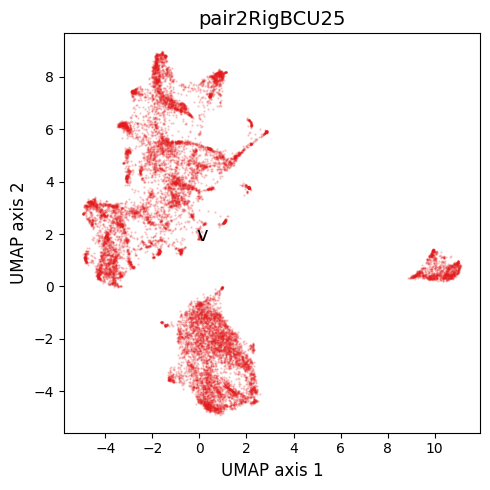

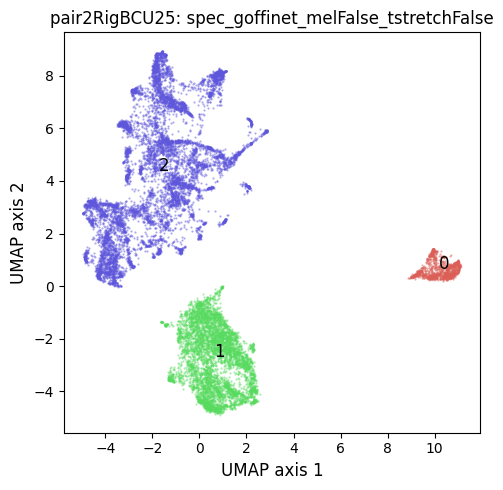

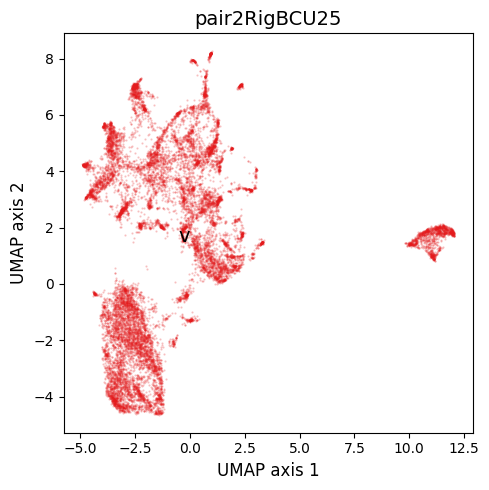

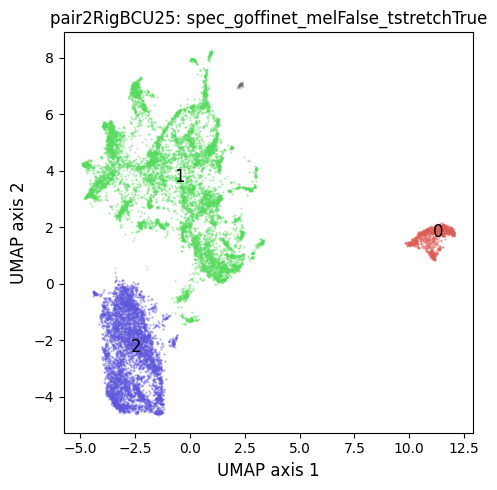

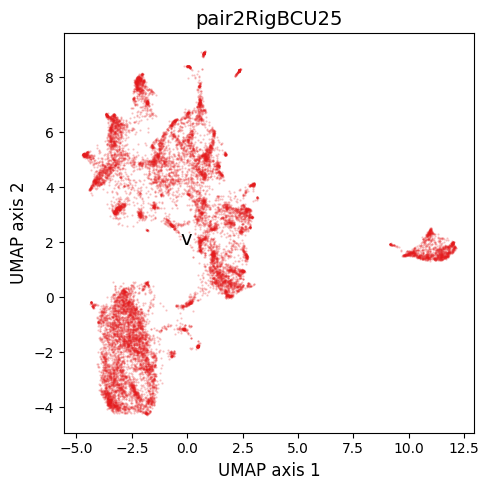

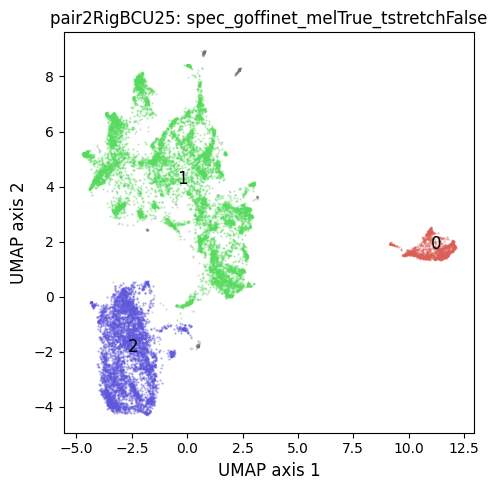

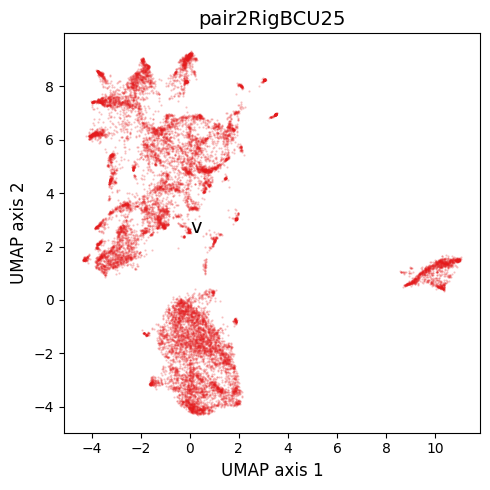

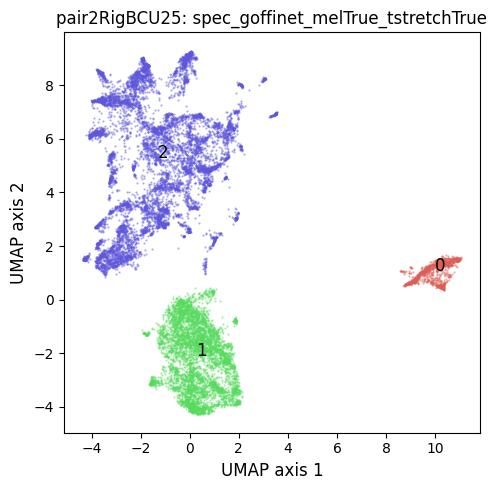

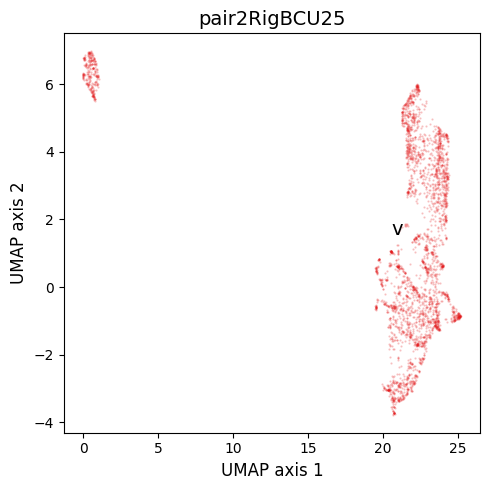

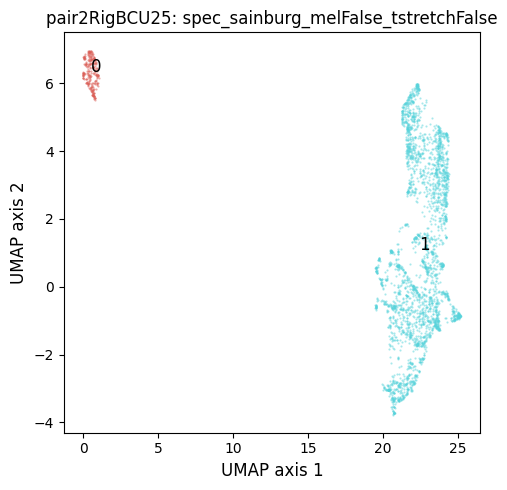

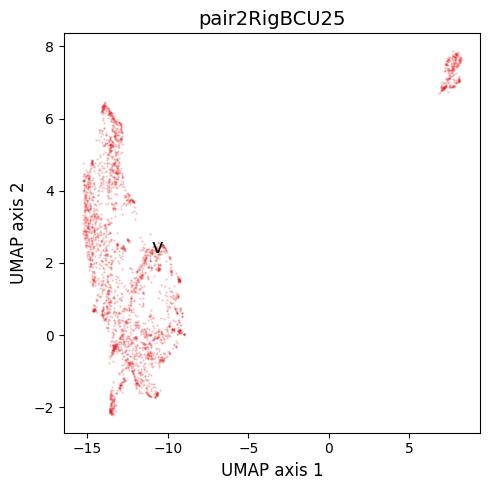

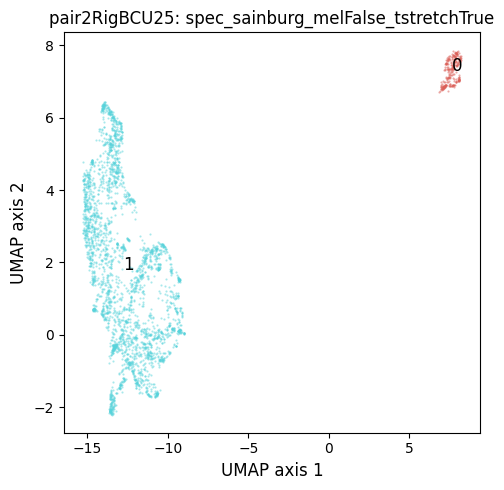

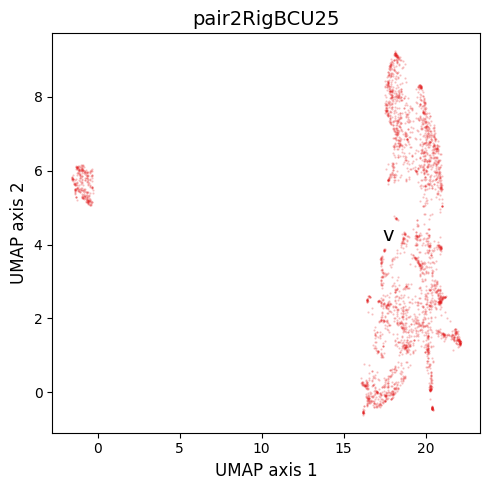

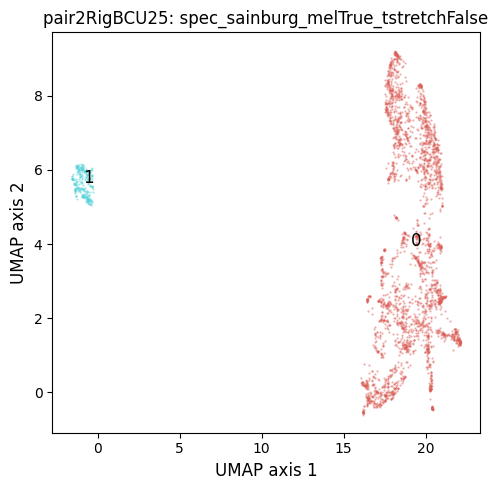

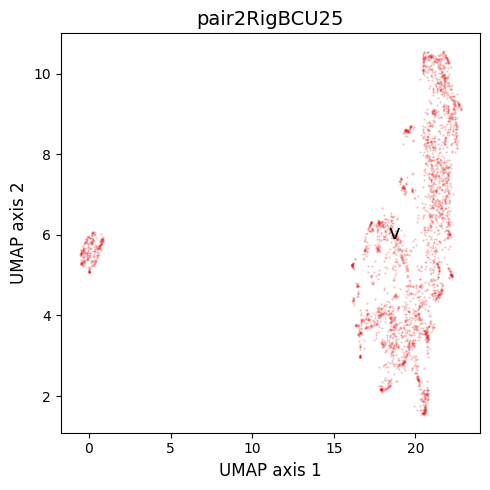

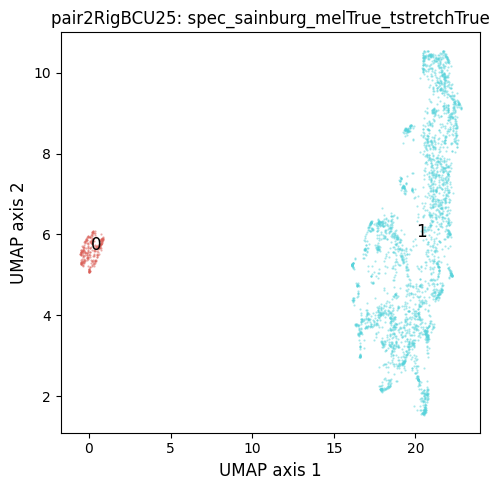

In [10]:
# loop through birds
for bi in range(0, len(birdIDs)):
    bd = birdIDs[bi]
    fd_save = os.path.join(fd_data, bd, 'UMAPonSpec', sylStr)
    if not os.path.exists(fd_save):
        os.makedirs(fd_save)

    # loop through run names
    # ri = 0 
    for ri in range(len(run_names)):
        rn = run_names[ri]
        print(f'Processing for {bd} {rn}...')
        ## load spectrograms and meta info
        fn_spec = os.path.join(fd_data, bd, 'Spectrogram', sylStr, f'{bd}.{sylStr}.{rn}.h5')
        fn_info = os.path.join(fd_data, bd, 'Spectrogram', sylStr, f'{bd}.{sylStr}.{rn}.info.csv')
        with h5py.File(fn_spec, 'r') as f:
            spec_win_all = f['spec_win_all'][:]  #

        info = pd.read_csv(fn_info, index_col=0)

        ## flatten spectrogram
        spec_flat = vae_goffinet.flatten_spectrograms(spec_win_all)
        print(spec_win_all.shape, info.shape, spec_flat.shape)

        ## run UMAP 
        print(param_umap)
        umap_model = umap.UMAP(n_neighbors=param_umap['n_neighbors'], n_components=param_umap['n_components'], min_dist=param_umap['min_dist'], 
                                                      metric=param_umap['metric'], random_state=1118, verbose=True)
        res = umap_model.fit_transform(spec_flat)

        # add UMAP embedding to the dataframe
        embed = info.copy()
        for jj in range(res.shape[1]):
            embed[f'umap{jj+1}'] = res[:,jj]

        ## plot embedding
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
        for si, ss in enumerate(syl):
            embed_s = embed[embed['label']==ss]
            ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, c=col_list[si])
            # add syl label
            ax.text(np.mean(embed_s['umap1']), np.mean(embed_s['umap2']), ss, fontsize=14)
        ax.set_title(bd, fontsize=14)
        ax.set_xlabel('UMAP axis 1', fontsize=12)
        ax.set_ylabel('UMAP axis 2', fontsize=12)
        plt.tight_layout()
        # save fig
        fn_fig =os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.embedding.pdf')
        fig.savefig(fn_fig)

        ## HDBSCAN clustering
        clusterer = hdbscan.HDBSCAN(min_cluster_size=int(res.shape[0]* param_hdbscan['min_cluster_size_frac']), min_samples=param_hdbscan['min_samples'])
        clusterer.fit(res)
        embed['hdbscan_cluster'] = clusterer.labels_
        embed['hdbscan_prob'] = clusterer.probabilities_

        # save embedding and clustering 
        fn_embed = os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.embedding.csv')
        embed.to_csv(fn_embed)

        # what's the fraction that's not clustered
        unc_f = embed[embed['hdbscan_cluster']==-1].shape[0] / embed.shape[0]
        print(f'The fraction that are not clustered: {unc_f:.4f}')
        num_c = max(embed['hdbscan_cluster']+1)
        print(f'Total number of clusters: {num_c}')

        # color calls according to hdbscan labels
        col_long = sns.color_palette('hls', n_colors=max(embed['hdbscan_cluster'])+1)
        # plot embedding
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
        for hi in range(-1, max(embed['hdbscan_cluster'])+1):
            embed_s = embed[embed['hdbscan_cluster']==hi]
            if hi==-1:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, color='#737373')
            else:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.5, color=col_long[hi])
                # add syl label
                ax.text(np.mean(embed_s['umap1']), np.mean(embed_s['umap2']), hi, fontsize=12)
        ax.set_title(f'{bd}: {rn}', fontsize=12)
        ax.set_xlabel('UMAP axis 1', fontsize=12)
        ax.set_ylabel('UMAP axis 2', fontsize=12)
        plt.tight_layout()
        # save fig
        fn_fig = os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.HBSCAN.pdf')
        fig.savefig(fn_fig)

        ## Quantify clusterability with Hopkins metrics
        hpk = hopkins.hopkins_statistic(res, m_prop_n=0.1, n_neighbors=1, distribution="uniform_convex_hull")
        print(f'Hopkins metric on UMAP: {hpk:.4f}')

        # Quantify clustering quality with Silhoutte score
        sil = silhouette_score(res, embed['hdbscan_cluster'], random_state=1118, metric='euclidean')
        print(f'Silhouette score on HDBSCAN: {sil:.4f}')

        # save data to the master data frame
        row = pd.DataFrame([{'birdID':bd, 'run_name':rn, 'num_cluster':num_c, 'frac_unclustered':unc_f, 'hopkins':hpk, 
                             'silhouette':sil, 'param_umap':param_umap, 'param_hdbscan':param_hdbscan}])
        metrics = pd.concat([metrics, row], ignore_index=True)

In [12]:
# save the metrics
fn_metric = os.path.join(fd_save, 'UMAPonSpec.metrics.csv')
metrics.to_csv(fn_metric)
metrics

birdID                              run_name  num_cluster  \
0   pair5RigCCU29  spec_goffinet_melFalse_tstretchFalse            6   
1   pair5RigCCU29   spec_goffinet_melFalse_tstretchTrue            6   
2   pair5RigCCU29   spec_goffinet_melTrue_tstretchFalse            6   
3   pair5RigCCU29    spec_goffinet_melTrue_tstretchTrue            6   
4   pair5RigCCU29  spec_sainburg_melFalse_tstretchFalse            8   
5   pair5RigCCU29   spec_sainburg_melFalse_tstretchTrue            6   
6   pair5RigCCU29   spec_sainburg_melTrue_tstretchFalse            5   
7   pair5RigCCU29    spec_sainburg_melTrue_tstretchTrue            5   
8   pair4RigACU68  spec_goffinet_melFalse_tstretchFalse            6   
9   pair4RigACU68   spec_goffinet_melFalse_tstretchTrue            6   
10  pair4RigACU68   spec_goffinet_melTrue_tstretchFalse            5   
11  pair4RigACU68    spec_goffinet_melTrue_tstretchTrue            5   
12  pair4RigACU68  spec_sainburg_melFalse_tstretchFalse            2   
13  pair4RigACU68   spec_sainburg_melFalse_tstretchTrue            6   
14  pair4RigACU68   spec_sainburg_melTrue_tstretchFalse            7   
15  pair4RigACU68    spec_sainburg_melTrue_tstretchTrue            2   
16  pair4RigBCU53  spec_goffinet_melFalse_tstretchFalse            6   
17  pair4RigBCU53   spec_goffinet_melFalse_tstretchTrue            6   
18  pair4RigBCU53   spec_goffinet_melTrue_tstretchFalse            6   
19  pair4RigBCU53    spec_goffinet_melTrue_tstretchTrue            5   
20  pair4RigBCU53  spec_sainburg_melFalse_tstretchFalse            6   
21  pair4RigBCU53   spec_sainburg_melFalse_tstretchTrue            5   
22  pair4RigBCU53   spec_sainburg_melTrue_tstretchFalse            4   
23  pair4RigBCU53    spec_sainburg_melTrue_tstretchTrue            2   
24  pair2RigBCU25  spec_goffinet_melFalse_tstretchFalse            3   
25  pair2RigBCU25   spec_goffinet_melFalse_tstretchTrue            3   
26  pair2RigBCU25   spec_goffinet_melTrue_tstretchFalse            3   
27  pair2RigBCU25    spec_goffinet_melTrue_tstretchTrue            3   
28  pair2RigBCU25  spec_sainburg_melFalse_tstretchFalse            2   
29  pair2RigBCU25   spec_sainburg_melFalse_tstretchTrue            2   
30  pair2RigBCU25   spec_sainburg_melTrue_tstretchFalse            2   
31  pair2RigBCU25    spec_sainburg_melTrue_tstretchTrue            2   

    frac_unclustered   hopkins  silhouette  \
0           0.106110  0.978816    0.401065   
1           0.074527  0.977083    0.349110   
2           0.048236  0.981623    0.390744   
3           0.113382  0.978579    0.375310   
4           0.196773  0.978439    0.273348   
5           0.226592  0.972535    0.205893   
6           0.036059  0.974815    0.457107   
7           0.079776  0.971542    0.245675   
8           0.141231  0.981461    0.356515   
9           0.176848  0.984185    0.294614   
10          0.097032  0.983380    0.370492   
11          0.124398  0.983504    0.385909   
12          0.074397  0.980925    0.273665   
13          0.282213  0.973612    0.104249   
14          0.178415  0.973339    0.364319   
15          0.000000  0.971735    0.255885   
16          0.200692  0.966154    0.361967   
17          0.176794  0.973075    0.364177   
18          0.171792  0.972917    0.306925   
19          0.045634  0.972636    0.369772   
20          0.120378  0.964754    0.311881   
21          0.151002  0.977708    0.299688   
22          0.048729  0.954401    0.299704   
23          0.013579  0.963664    0.388182   
24          0.000000  0.978838    0.621489   
25          0.009604  0.977894    0.422080   
26          0.025407  0.975193    0.461987   
27          0.000000  0.976975    0.618897   
28          0.000000  0.990059    0.852623   
29          0.000000  0.987496    0.849645   
30          0.000000  0.989202    0.819759   
31          0.000000  0.983607    0.829553   

                                           param_umap  \
0   {'n_components': 2, 'n_neighbors': 25, 'min_di...   
1

## 3. Plot summary results

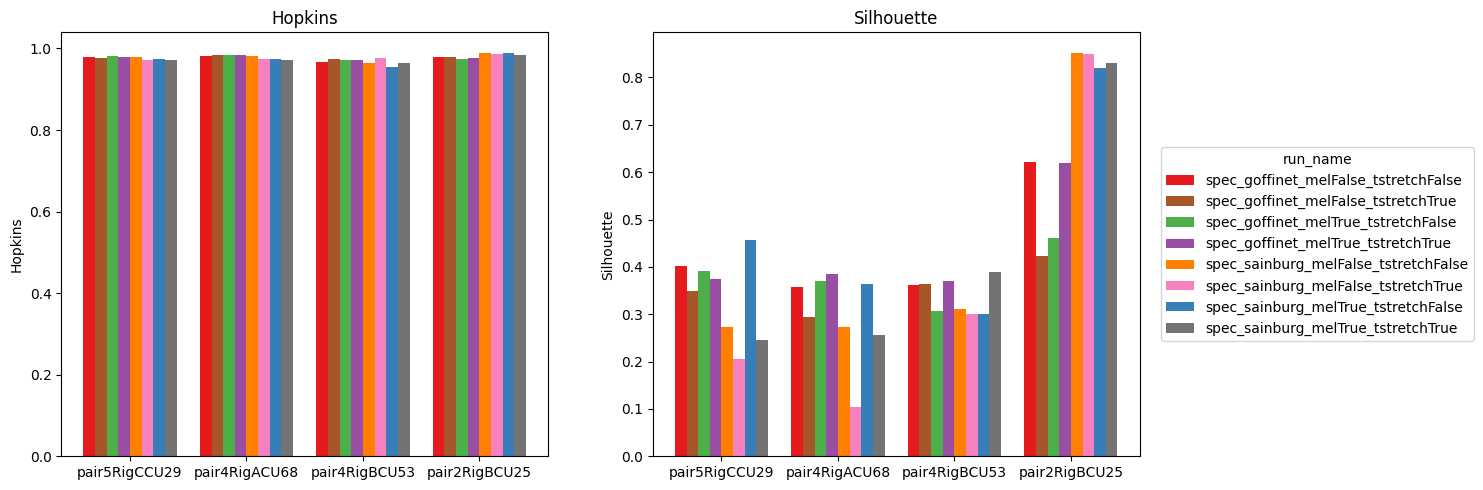

In [15]:
bird_ids = birdIDs
run_name_to_color = {run: col_list[i] for i, run in enumerate(run_names)}
# barplot of summary statistics
fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 0.3]})
metrics_to_plot = ['hopkins', 'silhouette']
width = 0.8 / len(run_names)
x = np.arange(len(bird_ids))

# Plot loop
for ax, metric in zip(axes[:2], metrics_to_plot):
    for i, run in enumerate(run_names):
        vals = [
            metrics.loc[(metrics['birdID'] == bird) & (metrics['run_name'] == run), metric].values[0]
            if not metrics[(metrics['birdID'] == bird) & (metrics['run_name'] == run)].empty else np.nan
            for bird in bird_ids
        ]
        ax.bar(x + i * width, vals, width, label=run, color=run_name_to_color[run])
    ax.set_title(metric.capitalize())
    ax.set_xticks(x + width * (len(run_names) - 1) / 2)
    ax.set_xticklabels(bird_ids)
    ax.set_ylabel(metric.capitalize())

# Legend in third panel
axes[2].axis('off')  # Hide axis
handles, labels = axes[0].get_legend_handles_labels()
axes[2].legend(handles, labels, title='run_name', loc='center')

plt.tight_layout()
plt.show()

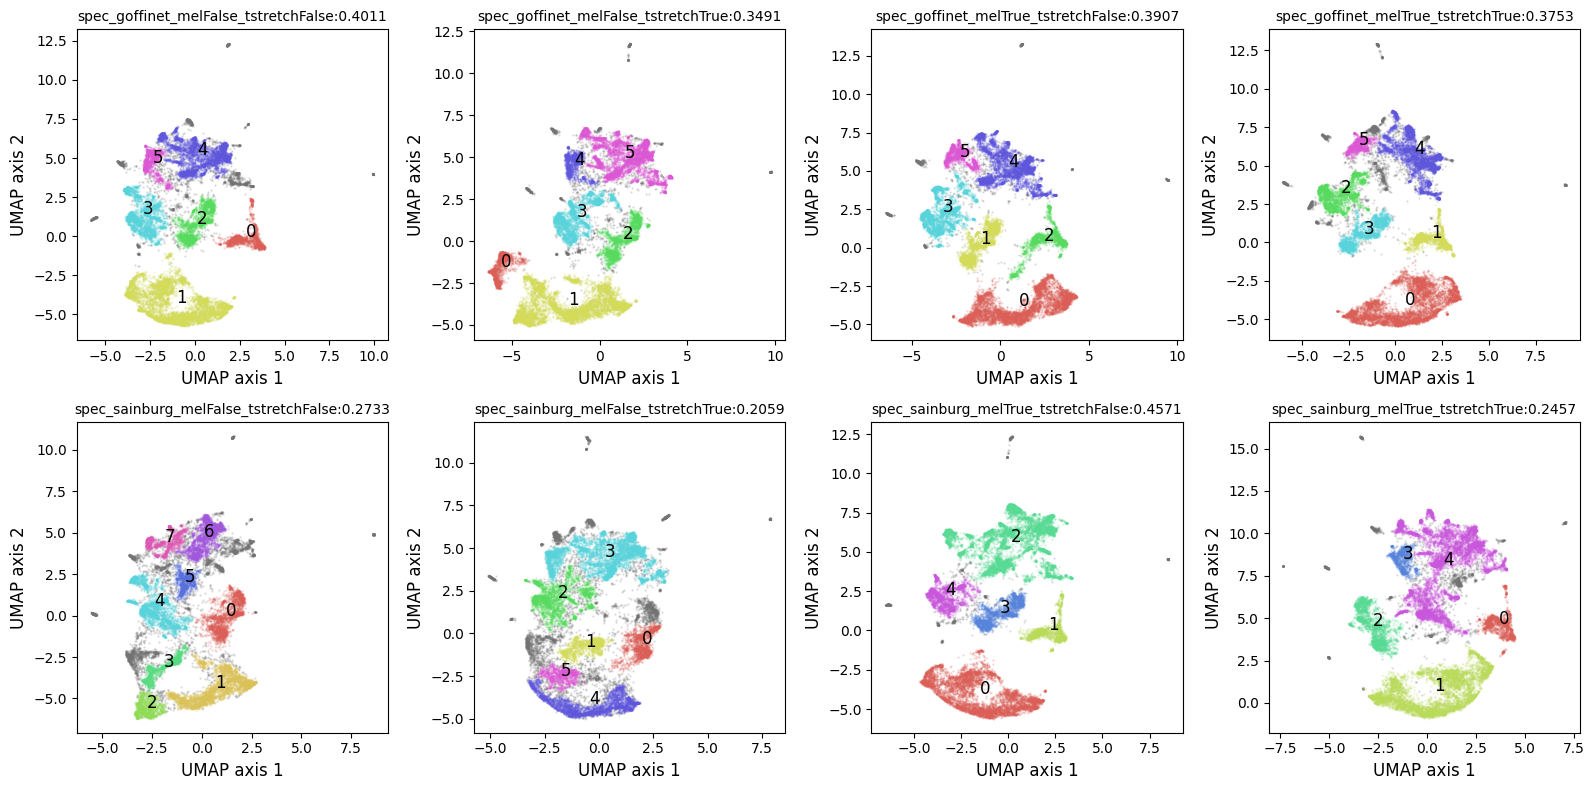

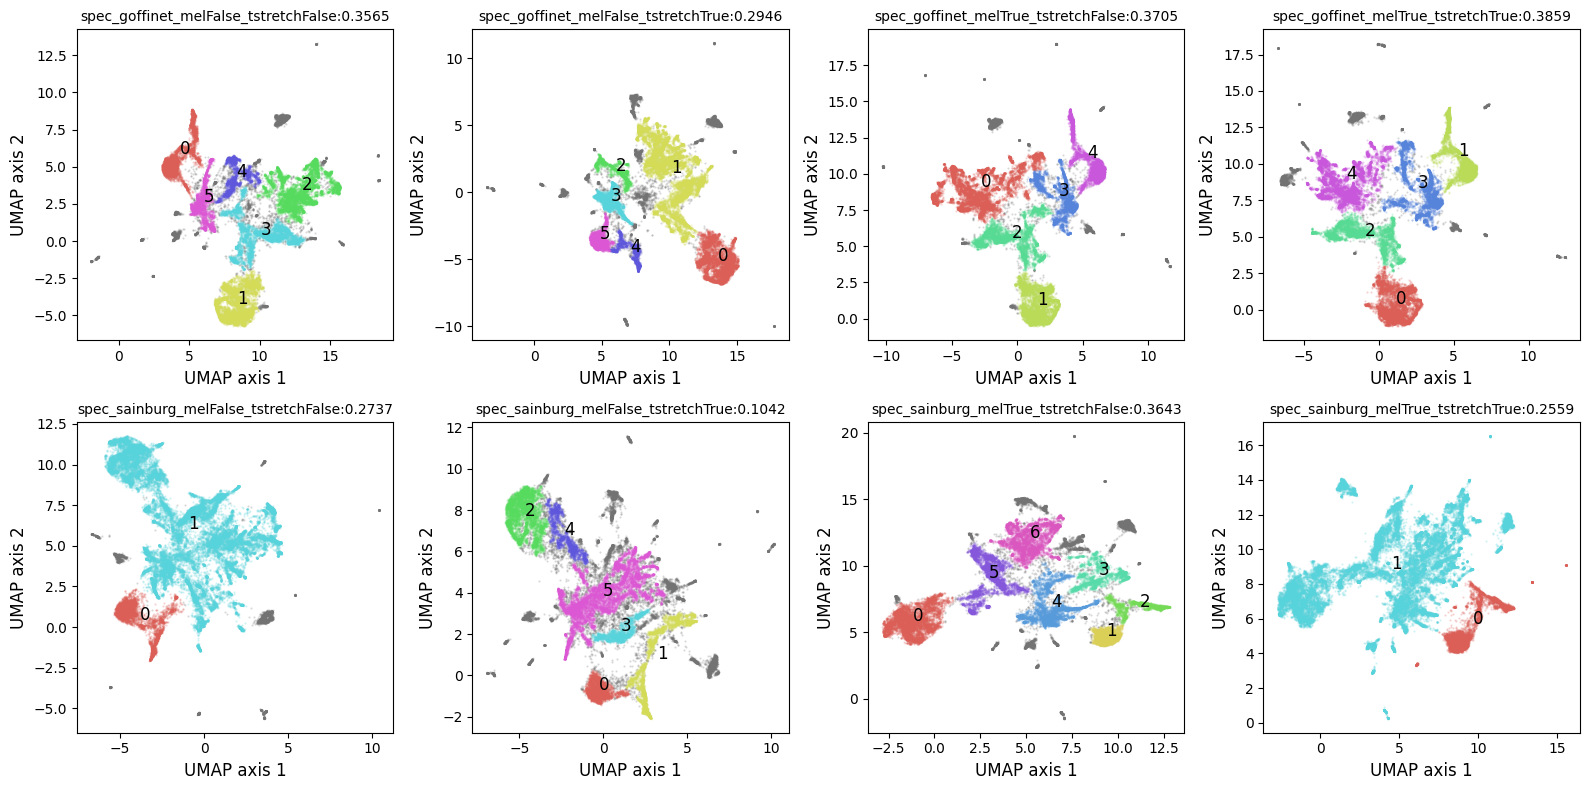

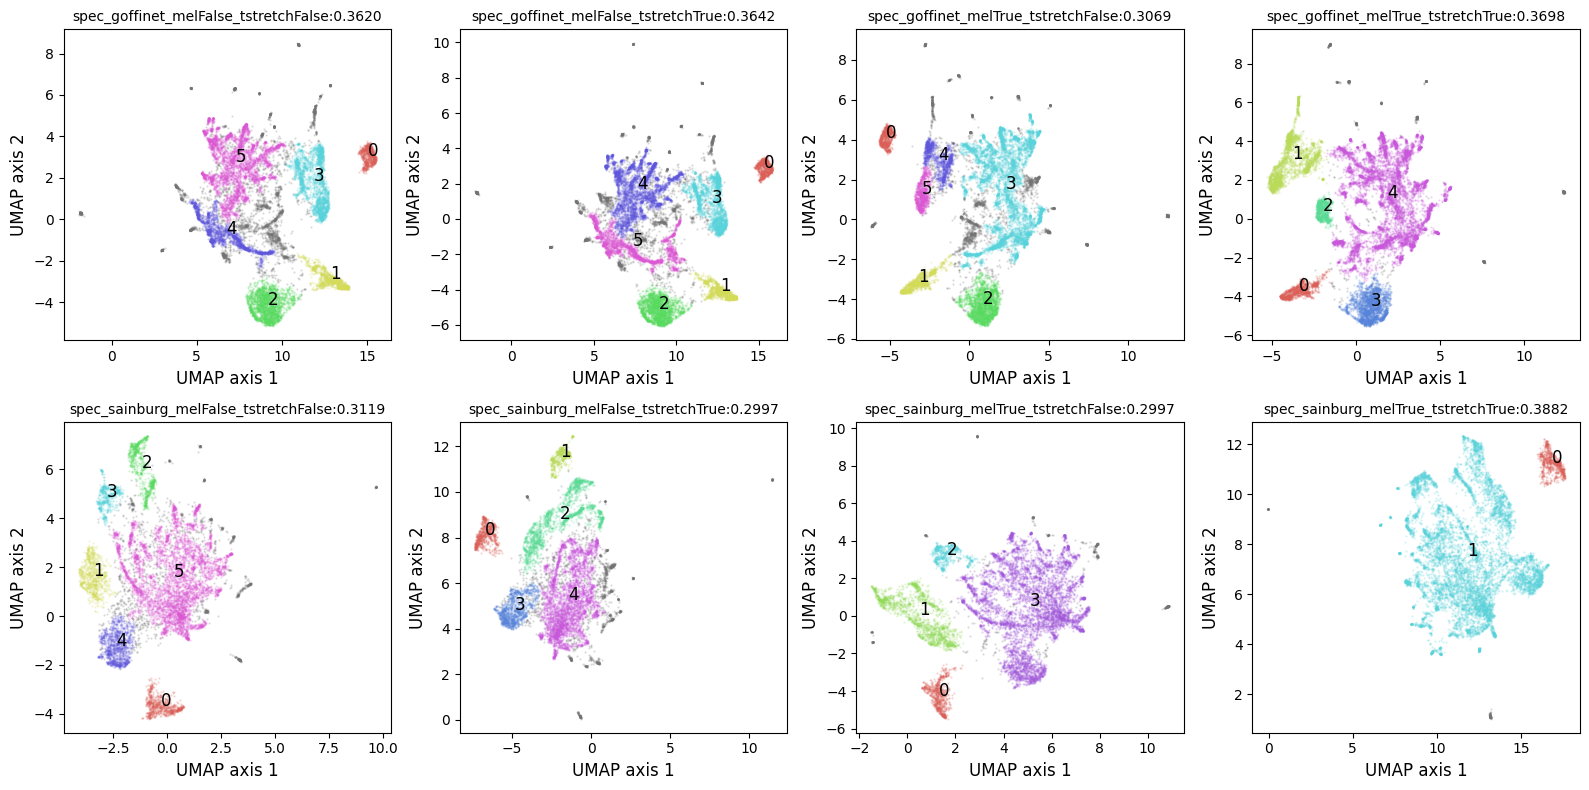

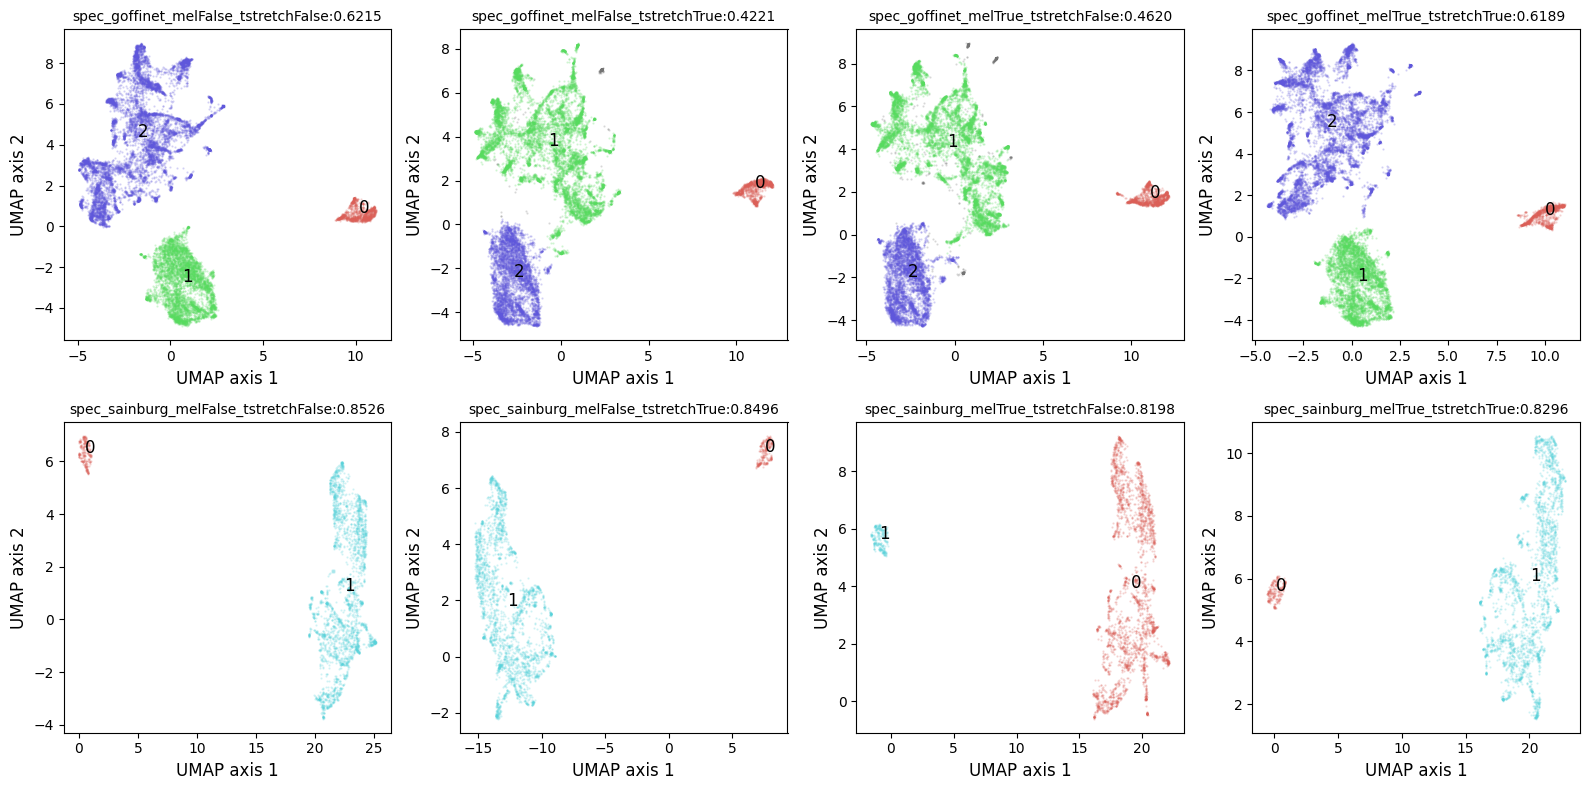

In [16]:
# Combine the HDBSCAN clustering plot
# bi = 0
for bi in range(len(birdIDs)):
    bd = birdIDs[bi]
    # one figure for each bird
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=[16, 8])

    for ri in range(len(run_names)):
        rn = run_names[ri]
        fd_save = os.path.join(fd_data, bd, 'UMAPonSpec', sylStr)
        fn_embed = os.path.join(fd_save, f'{bd}.UMAPonSpec.{rn}.embedding.csv')
        embed = pd.read_csv(fn_embed, index_col=0)

        plot_i = ri//4
        plot_j = ri%4
        ax = axes[plot_i][plot_j]
        # color calls according to hdbscan labels
        col_long = sns.color_palette('hls', n_colors=max(embed['hdbscan_cluster'])+1)
        # plot embedding
        for hi in range(-1, max(embed['hdbscan_cluster'])+1):
            embed_s = embed[embed['hdbscan_cluster']==hi]
            if hi==-1:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, color='#737373')
            else:
                ax.scatter(embed_s['umap1'], embed_s['umap2'], s=0.3, alpha=0.25, color=col_long[hi])
                # add syl label
                ax.text(np.mean(embed_s['umap1']), np.mean(embed_s['umap2']), hi, fontsize=12)
        sil = metrics.loc[(metrics['birdID'] == bd) & (metrics['run_name'] == rn), 'silhouette'].iloc[0]
        ax.set_title(f'{rn}:{sil:.4f}', fontsize=10)
        ax.set_xlabel('UMAP axis 1', fontsize=12)
        ax.set_ylabel('UMAP axis 2', fontsize=12)
    plt.tight_layout()
    # save plot
    fn_fig = os.path.join(fd_save, f'{bd}.HDBSCANcomb.pdf')
    fig.savefig(fn_fig)